### Imports und Weissemodell

In [1]:
import modelbase
import modelbase.ratelaws as rl
from weisse import WeisseBaseModel, defaultParameters

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
import seaborn as sns
import pandas as pd

Could not load modelbase.assimulate. Sundials support disabled.


In [2]:
cl = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq']

In [38]:

        # neue funktion mit alex gemacht
        #def inhibitionm(par, mx):
        #    return np.array([1 / (1 + (mx/par.KM) ** par.hm)])
        #self.add_reaction('Im',inhibitionm,{'mx':-1},mx)
        ######   

### Weisemodel über Zeit

In [3]:
valuesOneHundredTimeSteps, valuesLastTimeStep = [],[]
m = WeisseBaseModel()
s = modelbase.Simulator(m)
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])
changedValuesOverTimeArray = s.timeCourse(np.linspace(0,3000,100),weise_values);
valuesOneHundredTimeSteps.append(changedValuesOverTimeArray)
valuesLastTimeStep.append(changedValuesOverTimeArray[-1])



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  self.messages.get(istate, unexpected_istate_msg)))


### Enzyme- und Proteinraten

In [4]:
vr = s.getRate('vr').tolist()
vt = s.getRate('vt').tolist()
vm = s.getRate('vm').tolist()
vq = s.getRate('vq').tolist()

### Proteinraten über die Zeit gepoltet

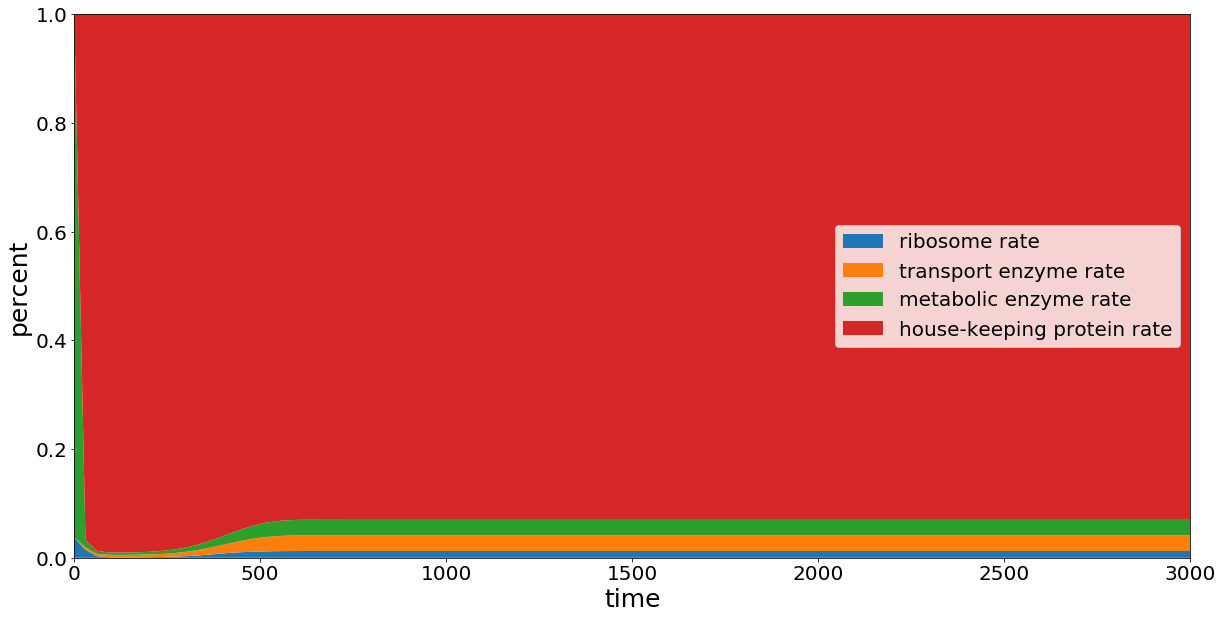

In [5]:
# Make data
data = pd.DataFrame({'group_A':vr, 'group_B':vt, 'group_C':vm, 'group_D':vq}, index=s.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['ribosome rate', 'transport enzyme rate', 'metabolic enzyme rate', 'house-keeping protein rate'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('prozentuale Verteilung der Proteine und Enzyme', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
#plt.ylableticks()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

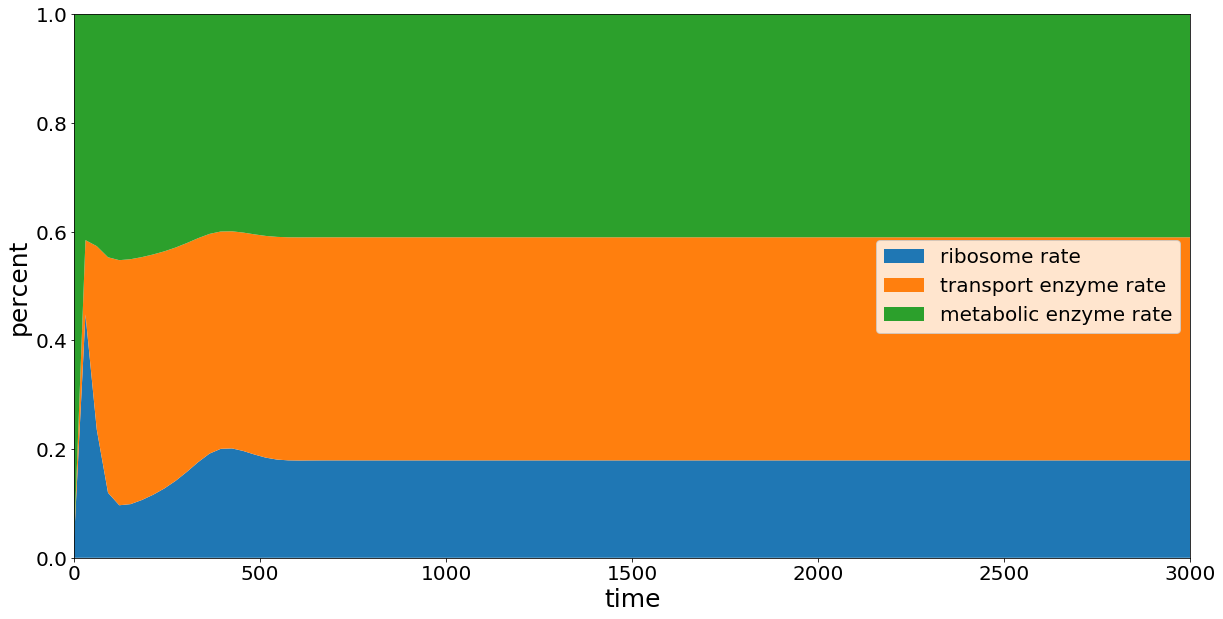

In [8]:
# Make data
data = pd.DataFrame({'group_A':vr, 'group_B':vt, 'group_C':vm}, index=s.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['ribosome rate', 'transport enzyme rate', 'metabolic enzyme rate', 'house-keeping protein rate'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('prozentuale Verteilung der Proteine und Enzyme', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
#plt.ylableticks()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

### Proteinrate mit aminosäuren multipliziert

In [14]:
vramino, vtamino, vmamino, vqamino = [], [], [], []
for i, date in enumerate(valuesOneHundredTimeSteps[0]):
    vramino.append(vr[i]*7459)
    vtamino.append(vt[i]*300)
    vmamino.append(vm[i]*300)
    vqamino.append(vq[i]*300)

### Proteinraten mit Aminosäuren multipliziert über die Zeit gepoltet

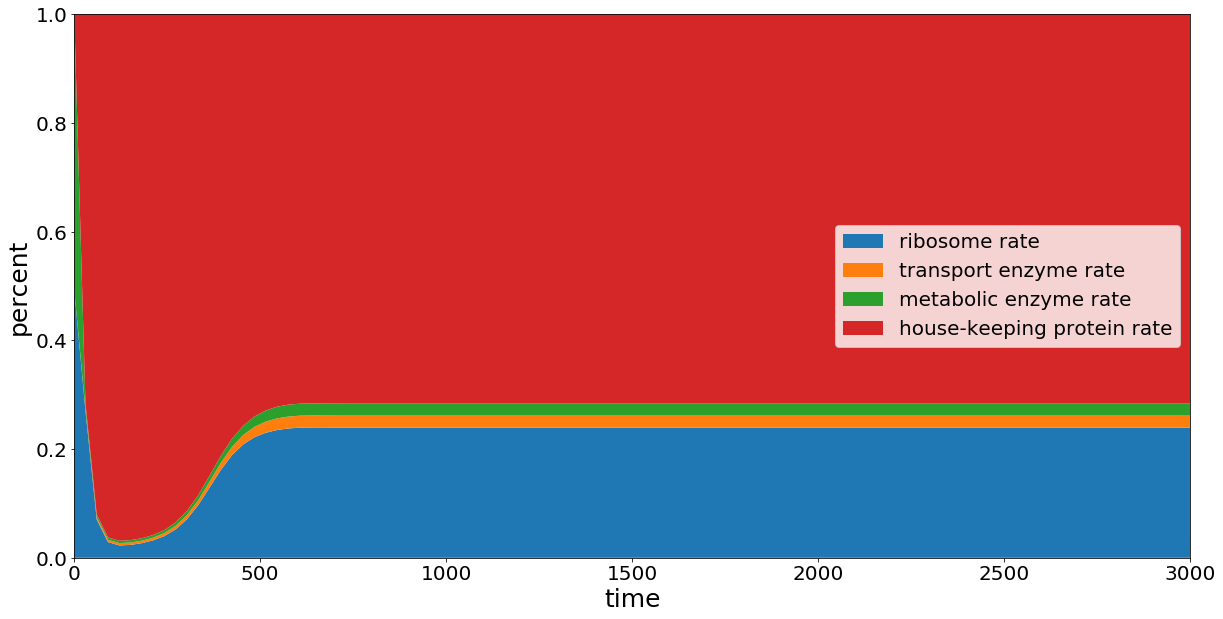

In [15]:
# Make data
data = pd.DataFrame({'group_A':vramino, 'group_B':vtamino, 'group_C':vmamino, 'group_D':vqamino}, index=s.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['ribosome rate', 'transport enzyme rate', 'metabolic enzyme rate', 'house-keeping protein rate'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('prozentuale Verteilung der Proteine und Enzyme', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
#plt.ylableticks()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

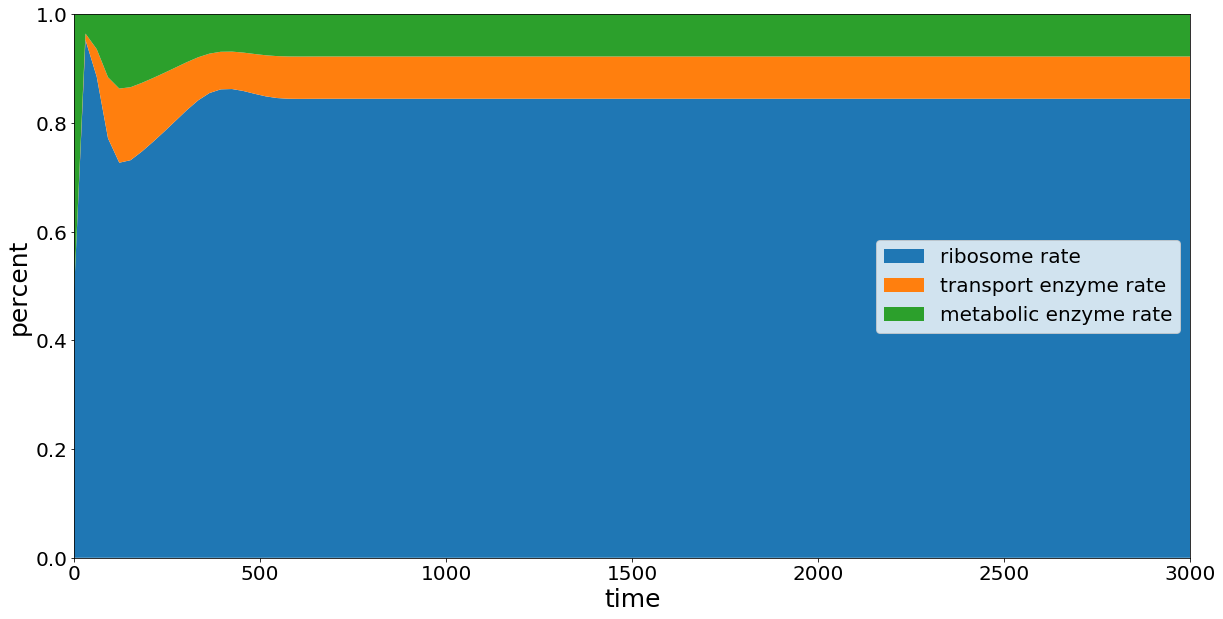

In [16]:
# Make data
data = pd.DataFrame({'group_A':vramino, 'group_B':vtamino, 'group_C':vmamino}, index=s.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['ribosome rate', 'transport enzyme rate', 'metabolic enzyme rate', 'house-keeping protein rate'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('prozentuale Verteilung der Proteine und Enzyme', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
#plt.ylableticks()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

# Nährstoffimport inhibiert

In [9]:
valuesOneHundredTimeStepsInh, valuesLastTimeStepInh = [],[]
minh = WeisseBaseModel()
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])

minh.par.update({'vt': 10})
sinh = modelbase.Simulator(minh)
changedValuesOverTimeArrayInh = sinh.timeCourse(np.linspace(0,3000,100),weise_values);
valuesOneHundredTimeStepsInh.append(changedValuesOverTimeArrayInh)
valuesLastTimeStepInh.append(changedValuesOverTimeArrayInh[-1])


### Enzym- und Proteinraten nach Inhibierung

In [10]:
vrinh = sinh.getRate('vr').tolist()
vtinh = sinh.getRate('vt').tolist()
vminh = sinh.getRate('vm').tolist()
vqinh = sinh.getRate('vq').tolist()

### Proteine nach Inhibierung über die Zeit gepoltet

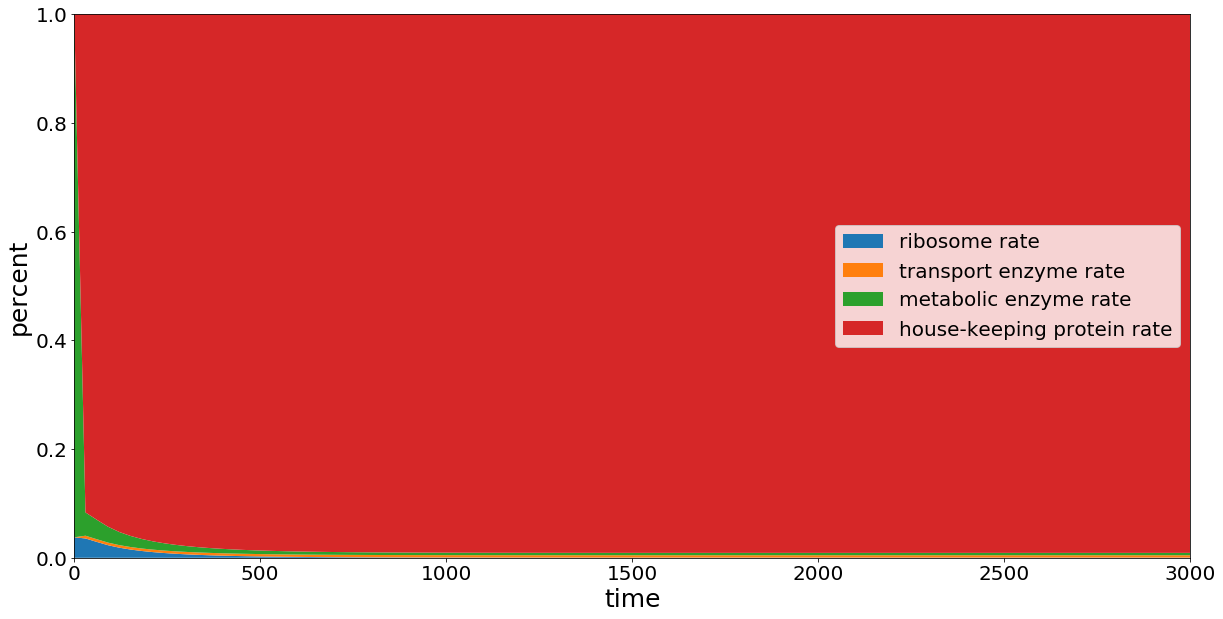

In [12]:
# Make data
data = pd.DataFrame({'group_A':vrinh, 'group_B':vtinh, 'group_C':vminh,'group_D':vqinh}, index=sinh.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)

# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(sinh.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"],data_perc["group_D"], labels=['ribosome rate', 'transport enzyme rate', 'metabolic enzyme rate', 'house-keeping protein rate'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('Percent distribution of proteins and enzymes \n with inhibition of nutrient import', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

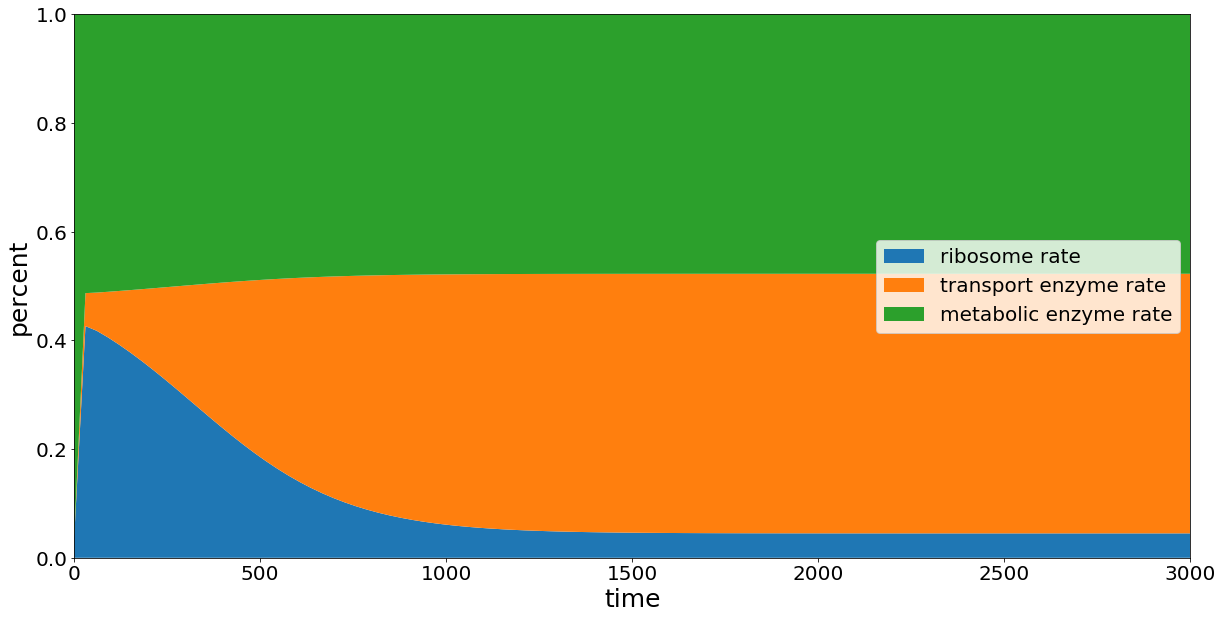

In [13]:
# Make data
data = pd.DataFrame({'group_A':vrinh, 'group_B':vtinh, 'group_C':vminh}, index=sinh.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)

# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(sinh.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['ribosome rate', 'transport enzyme rate', 'metabolic enzyme rate', 'house-keeping protein rate'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('Percent distribution of proteins and enzymes \n with inhibition of nutrient import', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

### Proteinraten nach Inhibierung mit aminosäuren multipliziert

In [17]:
vrinhamino, vtinhamino, vminhamino, vqinhamino = [], [], [], []
for i , data in enumerate(vrinh):
    vrinhamino.append(vrinh[i]* 7459)
    vtinhamino.append(vtinh[i]* 300)
    vminhamino.append(vminh[i]* 300)
    vqinhamino.append(vqinh[i]* 300)

### Komplexe und Proteine nach Inhibierung mit aminosäuren multipliziert über die Zeit gepoltet

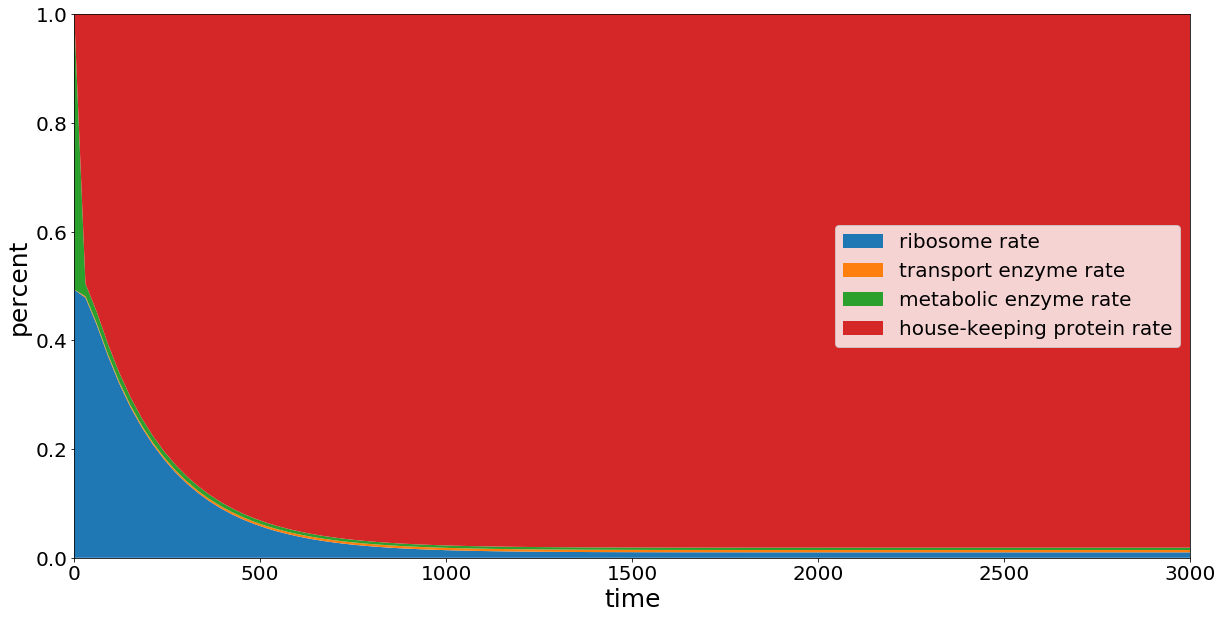

In [19]:
# Make data
data = pd.DataFrame({'group_A':vrinhamino, 'group_B':vtinhamino, 'group_C':vminhamino, 'group_D':vqinhamino}, index=s.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['ribosome rate', 'transport enzyme rate', 'metabolic enzyme rate', 'house-keeping protein rate'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('Percent distribution of proteins and enzymes \n inhibiting nutrient import into amino acids', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

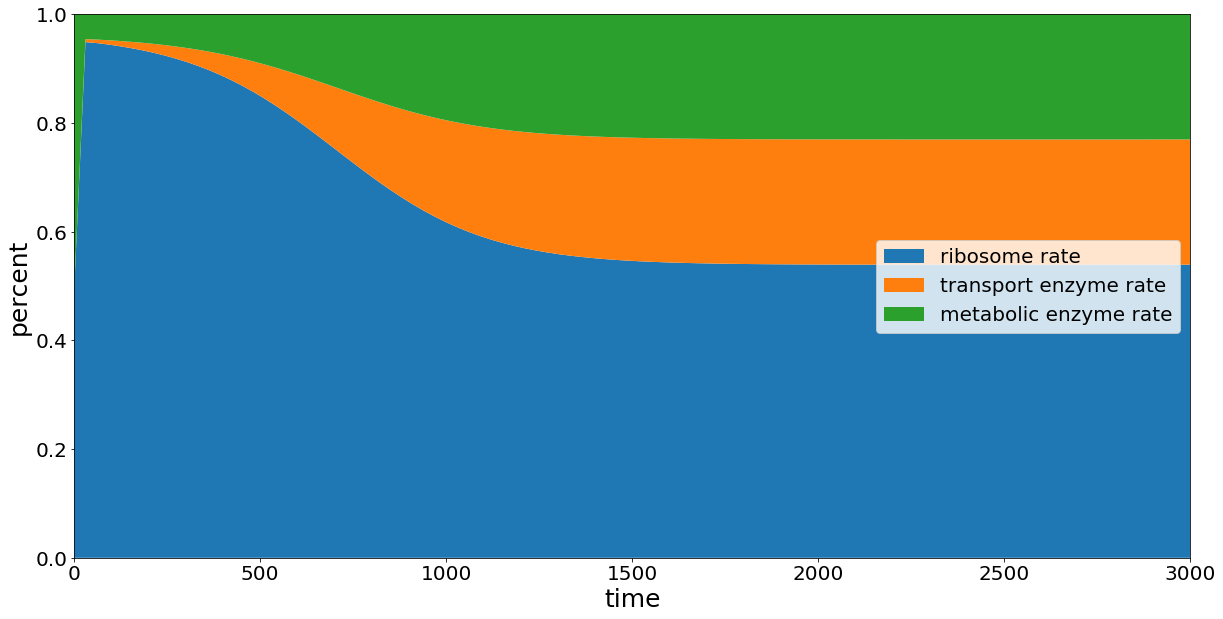

In [22]:
# Make data
data = pd.DataFrame({'group_A':vrinhamino, 'group_B':vtinhamino, 'group_C':vminhamino}, index=sinh.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(sinh.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['ribosome rate', 'transport enzyme rate ', 'metabolic enzyme rate', 'house-keeping protein rate'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('Inhibition of nutrient import without house-keeping proteins', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()
